<h1>Neural Networks Basics (Perceptron, Activation Functions)</h1>

In [7]:
import numpy as np
import matplotlib.pyplot as plt


<h1>Create a Simple Dataset</h1>

In [10]:
# Generate input data (100 points between 0 and 1)
X = np.linspace(0, 1, 100).reshape(-1, 1)

# Generate target output: y = 3*x + some noise
y = 3 * X.squeeze() + np.random.randn(100) * 0.1


<h1>Define Activation Functions</h1>

In [13]:
# ReLU activation
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU (needed for backward pass)
def relu_derivative(x):
    return (x > 0).astype(float)

# Identity activation for output layer (no non-linearity in regression output)
def identity(x):
    return x


<h1>Initialize Parameters (Weights and Biases)</h1>

In [16]:
# Network architecture: 
# 1 input neuron -> 10 hidden neurons -> 1 output neuron

input_size = 1
hidden_size = 10
output_size = 1

# Initialize weights randomly
np.random.seed(42)  # for reproducibility

W1 = np.random.randn(input_size, hidden_size)  # input → hidden layer
b1 = np.zeros((1, hidden_size))                # bias for hidden layer

W2 = np.random.randn(hidden_size, output_size) # hidden → output layer
b2 = np.zeros((1, output_size))                 # bias for output layer


<h1>Define Loss Function (MSE)</h1>

In [29]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
    

<h1>Training Loop (Forward Pass → Backward Pass → Update)</h1>

In [32]:
# Training settings
learning_rate = 0.01
epochs = 1000

# Training loop
for epoch in range(epochs):
    
    # ---- Forward Pass ----
    Z1 = np.dot(X, W1) + b1    # Input to hidden layer
    A1 = relu(Z1)              # Activation from hidden layer
    
    Z2 = np.dot(A1, W2) + b2   # Input to output layer
    y_pred = identity(Z2)      # Output (regression: no activation)
    
    # ---- Loss Calculation ----
    loss = mean_squared_error(y, y_pred)
    
    # ---- Backward Pass ----
    dLoss_y_pred = 2 * (y_pred - y.reshape(-1, 1)) / y.shape[0]  # Derivative of MSE
    
    # Gradients for W2 and b2 (hidden → output layer)
    dLoss_W2 = np.dot(A1.T, dLoss_y_pred)
    dLoss_b2 = np.sum(dLoss_y_pred, axis=0, keepdims=True)
    
    # Gradients for hidden layer
    dLoss_A1 = np.dot(dLoss_y_pred, W2.T)
    dLoss_Z1 = dLoss_A1 * relu_derivative(Z1)
    
    # Gradients for W1 and b1 (input → hidden layer)
    dLoss_W1 = np.dot(X.T, dLoss_Z1)
    dLoss_b1 = np.sum(dLoss_Z1, axis=0, keepdims=True)
    
    # ---- Update Parameters (Gradient Descent) ----
    W2 -= learning_rate * dLoss_W2
    b2 -= learning_rate * dLoss_b2
    W1 -= learning_rate * dLoss_W1
    b1 -= learning_rate * dLoss_b1
    
    # ---- Print Loss Every 100 Epochs ----
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.6f}")


Epoch 100/1000, Loss: 1.013075
Epoch 200/1000, Loss: 1.201122
Epoch 300/1000, Loss: 1.361601
Epoch 400/1000, Loss: 1.458541
Epoch 500/1000, Loss: 1.512658
Epoch 600/1000, Loss: 1.541929
Epoch 700/1000, Loss: 1.558241
Epoch 800/1000, Loss: 1.567269
Epoch 900/1000, Loss: 1.572274
Epoch 1000/1000, Loss: 1.575170


<h1>Plot the Results</h1>

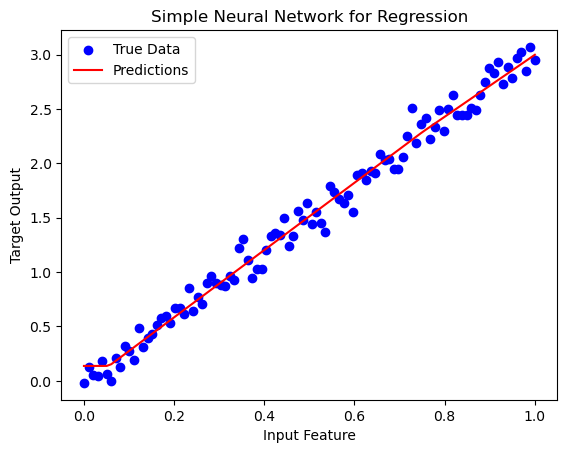

In [34]:
# Plotting true data vs predictions
plt.scatter(X, y, color='blue', label='True Data')
plt.plot(X, y_pred, color='red', label='Predictions')
plt.title('Simple Neural Network for Regression')
plt.xlabel('Input Feature')
plt.ylabel('Target Output')
plt.legend()
plt.show()
